# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier # KNN Method
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline

# 1. Dataset

## Load Dataset

In [39]:
filename1="vessel-calls-75-gt-monthly.csv"
data1_csv="C:/Users/Constance Lim/OneDrive/Desktop/Learning/IOD/Project/MP2/Option 5/"+filename1
data=pd.read_csv(data1_csv)

# 2. Data Pre-processing

## Explore the Data

In [27]:
#size of table
data.shape

(1750, 4)

In [40]:
#quick look on both of the dataset
data.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage
0,1993-01,Cargo,3435,28623.45
1,1993-01,Repairs,293,2780.47
2,1993-01,Bunkers,1767,33804.90
3,1993-01,Supplies,1132,16462.30
4,1993-01,Others,5126,1158.03


In [41]:
#check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   1750 non-null   object 
 1   purpose_type            1750 non-null   object 
 2   number_of_vessel_calls  1750 non-null   int64  
 3   gross_tonnage           1750 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.8+ KB


In [42]:
#check the null value
data.isnull().sum()

month                     0
purpose_type              0
number_of_vessel_calls    0
gross_tonnage             0
dtype: int64

In [31]:
#Type of purpose
data.purpose_type.value_counts()

Others      350
Cargo       350
Bunkers     350
Supplies    350
Repairs     350
Name: purpose_type, dtype: int64

In [43]:
X = data.loc [:, ['number_of_vessel_calls','gross_tonnage']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [44]:
km = KMeans(n_clusters = 5, random_state= 42)
km.fit(X_sc)

KMeans(n_clusters=5, random_state=42)

In [45]:
# Check out centroids

km.cluster_centers_

array([[ 1.15074842, -0.42498313],
       [-0.95557236, -0.75543764],
       [ 0.02513117,  0.74305082],
       [ 0.12812793,  2.25640393],
       [ 1.76075656,  1.14054469]])

In [46]:
# Option 1: Class attribute

km.labels_

array([0, 1, 1, ..., 3, 2, 2])

In [47]:
# attach predicted cluster to original points

data['cluster'] = km.labels_
data.head(10)

,month,purpose_type,number_of_vessel_calls,gross_tonnage,cluster
0,1993-01,Cargo,3435,28623.45,0
1,1993-01,Repairs,293,2780.47,1
2,1993-01,Bunkers,1767,33804.90,1
3,1993-01,Supplies,1132,16462.30,1
4,1993-01,Others,5126,1158.03,0
5,1993-02,Cargo,3286,25186.60,0
6,1993-02,Repairs,300,2567.35,1
7,1993-02,Bunkers,1529,27641.53,1
8,1993-02,Supplies,1030,14288.14,1
9,1993-02,Others,4637,1335.42,0


In [37]:
## Create a dataframe for cluster_centers (centroids)

centroids = pd.DataFrame(
            sc.inverse_transform(km.cluster_centers_),
            columns = ["number_of_vessel_calls","gross_tonnage"]
)


ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 3.

<Figure size 504x504 with 0 Axes>

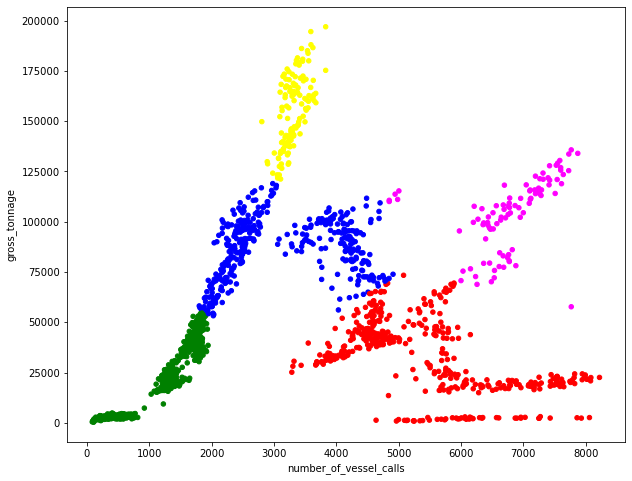

In [48]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue","yellow","magenta"]
data['color'] = data['cluster'].map(lambda p: colors[p])

ax = data.plot(    
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage",
    figsize=(10,8),
    c = data['color']
)

centroids.plot(
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage", 
    marker="*", c=["r", "g", "b","y","m"], s=550,
    ax=ax
);

In [59]:
data.head(10)

,month,purpose_type,number_of_vessel_calls,gross_tonnage,cluster,color
0,1993-01,Cargo,3435,28623.45,0,red
1,1993-01,Repairs,293,2780.47,1,green
2,1993-01,Bunkers,1767,33804.90,1,green
3,1993-01,Supplies,1132,16462.30,1,green
4,1993-01,Others,5126,1158.03,0,red
5,1993-02,Cargo,3286,25186.60,0,red
6,1993-02,Repairs,300,2567.35,1,green
7,1993-02,Bunkers,1529,27641.53,1,green
8,1993-02,Supplies,1030,14288.14,1,green
9,1993-02,Others,4637,1335.42,0,red


In [60]:
data.tail(10)

,month,purpose_type,number_of_vessel_calls,gross_tonnage,cluster,color
1740,2022-01,Cargo,3556,90213.831,2,blue
1741,2022-01,Repairs,103,1231.154,1,green
1742,2022-01,Bunkers,3115,168311.066,3,yellow
1743,2022-01,Supplies,2238,98023.351,2,blue
1744,2022-01,Others,2170,59851.551,2,blue
1745,2022-02,Cargo,3182,83881.959,2,blue
1746,2022-02,Repairs,100,1217.094,1,green
1747,2022-02,Bunkers,2805,149768.462,3,yellow
1748,2022-02,Supplies,2040,89525.293,2,blue
1749,2022-02,Others,1965,58258.367,2,blue


In [68]:
data[data['cluster']==0]

,month,purpose_type,number_of_vessel_calls,gross_tonnage,cluster,color
0,1993-01,Cargo,3435,28623.45,0,red
4,1993-01,Others,5126,1158.03,0,red
5,1993-02,Cargo,3286,25186.60,0,red
9,1993-02,Others,4637,1335.42,0,red
10,1993-03,Cargo,3677,29227.04,0,red
...,...,...,...,...,...,...
1179,2012-08,Others,5839,68918.13,0,red
1184,2012-09,Others,5763,64939.31,0,red
1189,2012-10,Others,5871,67941.08,0,red
1194,2012-11,Others,5855,68556.40,0,red


In [64]:
trail

<AxesSubplot:xlabel='number_of_vessel_calls', ylabel='gross_tonnage'>

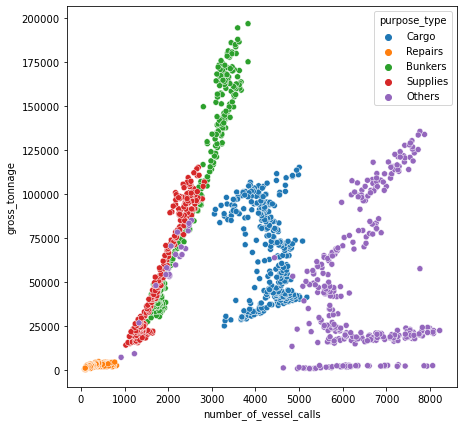

In [34]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x="number_of_vessel_calls", y="gross_tonnage", hue="purpose_type")

# DBSCAN

In [47]:
filename1="vessel-calls-75-gt-monthly.csv"
data1_csv="C:/Users/Constance Lim/OneDrive/Desktop/Learning/IOD/Project/MP2/Option 5/"+filename1
data=pd.read_csv(data1_csv)

In [48]:
X = data.loc [:, ['number_of_vessel_calls','gross_tonnage']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [50]:
dbscan = DBSCAN()
dbscan.fit(X_sc);

In [51]:
silhouette_score(X_sc, dbscan.labels_)

0.21867684264272363

In [52]:
data['cluster'] = dbscan.labels_

C:\Users\Constance Lim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Constance Lim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


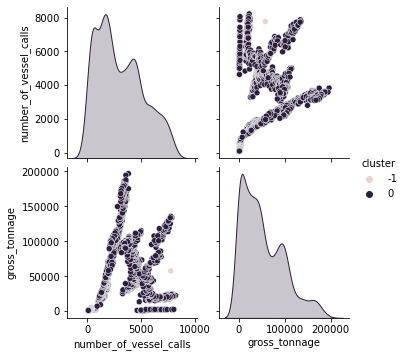

In [53]:
sns.pairplot(data, hue='cluster')

ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 3.

<Figure size 504x504 with 0 Axes>

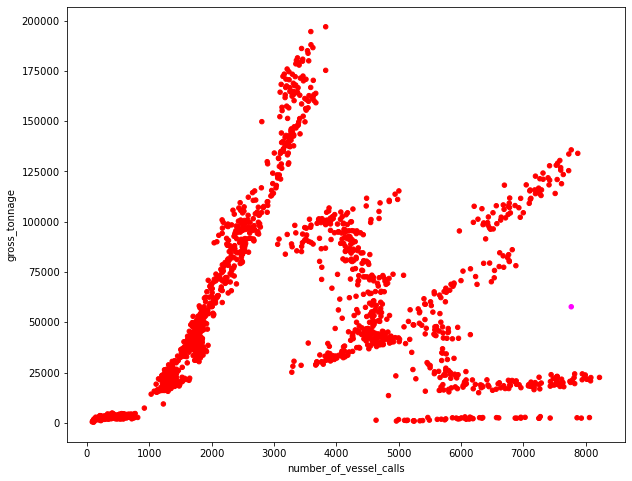

In [54]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue","yellow","magenta"]
data['color'] = data['cluster'].map(lambda p: colors[p])

ax = data.plot(    
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage",
    figsize=(10,8),
    c = data['color']
)

centroids.plot(
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage", 
    marker="*", c=["r", "g", "b","y","m"], s=550,
    ax=ax
);

# Eplore the relationship with month

In [2]:
filename1="vessel-calls-75-gt-monthly.csv"
data1_csv="C:/Users/Constance Lim/OneDrive/Desktop/Learning/IOD/Project/MP2/Option 5/"+filename1
data_month=pd.read_csv(data1_csv)

In [64]:
data_month.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage
0,1993-01,Cargo,3435,28623.45
1,1993-01,Repairs,293,2780.47
2,1993-01,Bunkers,1767,33804.90
3,1993-01,Supplies,1132,16462.30
4,1993-01,Others,5126,1158.03


In [3]:
#split the year to year and month
#x = txt.split(", ")

data_month['year_new'], data_month['month_new'] = data_month['month'].str.split('-',1).str

<ipython-input-3-dcd70e8951b9>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data_month['year_new'], data_month['month_new'] = data_month['month'].str.split('-',1).str


In [4]:
data_month.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage,year_new,month_new
0,1993-01,Cargo,3435,28623.45,1993,01
1,1993-01,Repairs,293,2780.47,1993,01
2,1993-01,Bunkers,1767,33804.90,1993,01
3,1993-01,Supplies,1132,16462.30,1993,01
4,1993-01,Others,5126,1158.03,1993,01


In [8]:
data_month['year_new']= pd.to_numeric(data_month['year_new'])
data_month['month_new']= pd.to_numeric(data_month['month_new'])

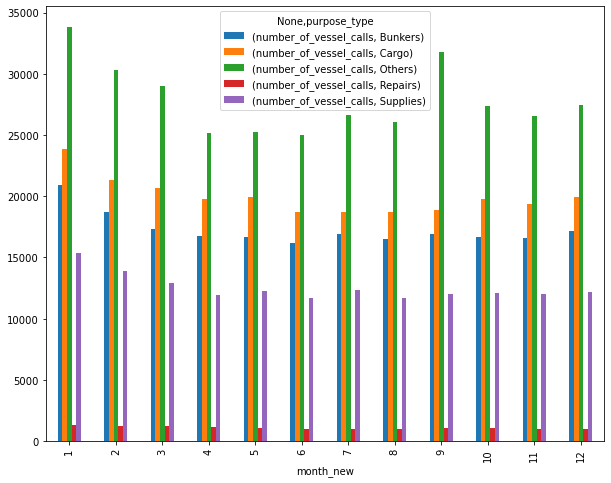

In [9]:
data_month[data_month['year_new']>=2017].groupby(by=['month_new','purpose_type']).agg({'number_of_vessel_calls': 'sum'}).unstack().plot(kind='bar', figsize=(10,8));

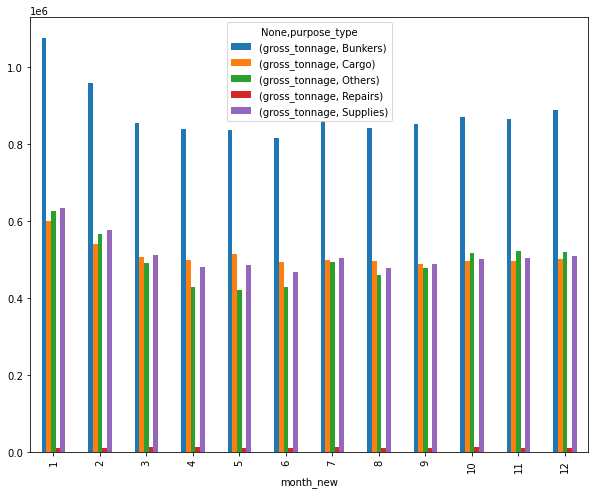

In [10]:
data_month[data_month['year_new']>=2017].groupby(by=['month_new','purpose_type']).agg({'gross_tonnage': 'sum'}).unstack().plot(kind='bar', figsize=(10,8));

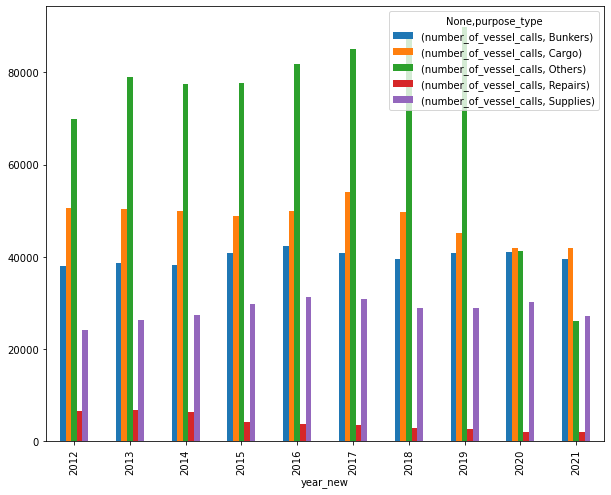

In [11]:
data_month[(data_month['year_new']>=2012)&(data_month['year_new']<2022)].groupby(by=['year_new','purpose_type']).agg({'number_of_vessel_calls': 'sum'}).unstack().plot(kind='bar', figsize=(10,8));

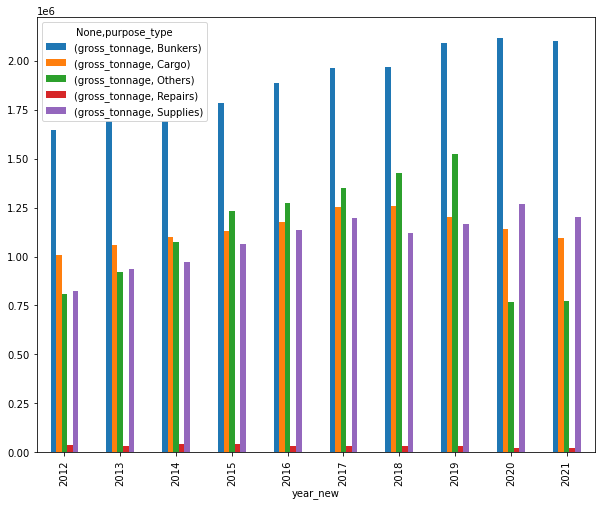

In [12]:
data_month[(data_month['year_new']>=2012)&(data_month['year_new']<2022)].groupby(by=['year_new','purpose_type']).agg({'gross_tonnage': 'sum'}).unstack().plot(kind='bar', figsize=(10,8));

In [13]:
data_month_recent=data_month[(data_month['year_new']>=2012)&(data_month['year_new']<2022)]

In [14]:
data_month_recent.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage,year_new,month_new
1140,2012-01,Cargo,4106,81510.95,2012,1
1141,2012-01,Repairs,697,2799.83,2012,1
1142,2012-01,Bunkers,3315,142623.86,2012,1
1143,2012-01,Supplies,1971,67896.64,2012,1
1144,2012-01,Others,5571,64175.07,2012,1


In [15]:
X_new = data_month_recent.loc [:, ['number_of_vessel_calls','gross_tonnage']]
sc = StandardScaler()
X_new_sc = sc.fit_transform(X_new)

In [16]:
km = KMeans(n_clusters = 5, random_state= 42)
km.fit(X_new_sc)

KMeans(n_clusters=5, random_state=42)

In [17]:
# Check out centroids

km.cluster_centers_

array([[ 4.12782394e-01,  1.34478832e-01],
       [-1.39307355e+00, -1.64275951e+00],
       [ 1.75315742e+00,  2.43176661e-01],
       [ 6.07523659e-02,  1.35196295e+00],
       [-4.12126274e-01, -1.04249213e-03]])

In [18]:
# Option 1: Class attribute

km.labels_

array([0, 1, 3, 4, 2, 0, 1, 3, 4, 0, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1,
       3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4,
       2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0,
       1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3,
       4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2,
       0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1,
       3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4,
       2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0,
       1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3,
       4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2,
       0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1,
       3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4,
       2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0,
       1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0,

In [19]:
data_month_recent['cluster'] = km.labels_

<ipython-input-19-db5bb38fb238>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_recent['cluster'] = km.labels_


In [20]:
data_month_recent.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage,year_new,month_new,cluster
1140,2012-01,Cargo,4106,81510.95,2012,1,0
1141,2012-01,Repairs,697,2799.83,2012,1,1
1142,2012-01,Bunkers,3315,142623.86,2012,1,3
1143,2012-01,Supplies,1971,67896.64,2012,1,4
1144,2012-01,Others,5571,64175.07,2012,1,2


In [21]:
## Create a dataframe for cluster_centers (centroids)

centroids = pd.DataFrame(
            sc.inverse_transform(km.cluster_centers_),
            columns = ["number_of_vessel_calls","gross_tonnage"]
)


<ipython-input-23-1b468e693cfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_recent['color'] = data_month_recent['cluster'].map(lambda p: colors[p])


<Figure size 504x504 with 0 Axes>

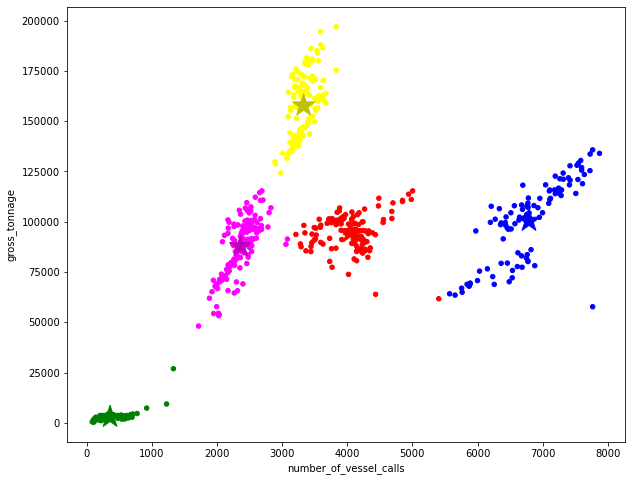

In [23]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue","yellow","magenta"]
data_month_recent['color'] = data_month_recent['cluster'].map(lambda p: colors[p])

ax = data_month_recent.plot(    
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage",
    figsize=(10,8),
    c = data_month_recent['color']
)

centroids.plot(
    kind="scatter", 
    x="number_of_vessel_calls", y="gross_tonnage", 
    marker="*", c=["r", "g", "b","y","m"], s=550,
    ax=ax
);

In [24]:
data_month_recent.head()

,month,purpose_type,number_of_vessel_calls,gross_tonnage,year_new,month_new,cluster,color
1140,2012-01,Cargo,4106,81510.95,2012,1,0,red
1141,2012-01,Repairs,697,2799.83,2012,1,1,green
1142,2012-01,Bunkers,3315,142623.86,2012,1,3,yellow
1143,2012-01,Supplies,1971,67896.64,2012,1,4,magenta
1144,2012-01,Others,5571,64175.07,2012,1,2,blue


<AxesSubplot:xlabel='number_of_vessel_calls', ylabel='gross_tonnage'>

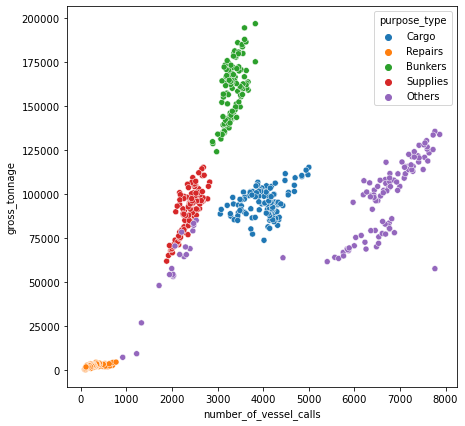

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data_month_recent, x="number_of_vessel_calls", y="gross_tonnage", hue="purpose_type")